In [8]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


%load_ext autoreload
%autoreload 2

import sys
if ".." not in sys.path:
    sys.path.append("..")



import clusterizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
num = clusterizer.globals.available_circuits[5]

circuit = clusterizer.circuit.MergedCircuit(num)
circuit.build()

<IPython.core.display.Javascript object>


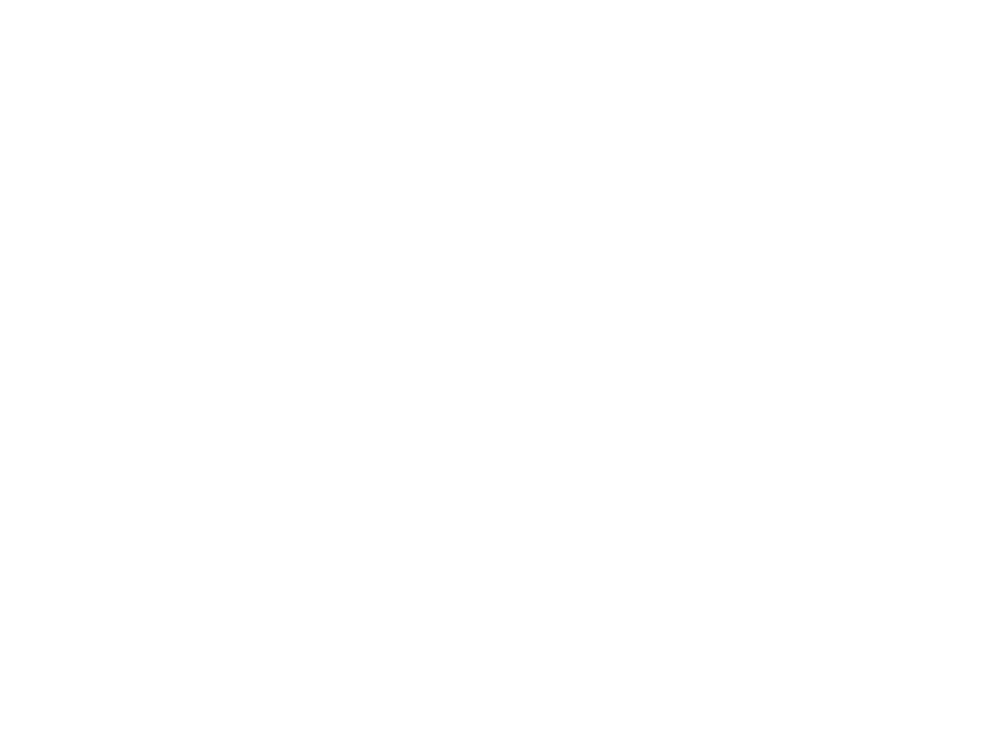

In [4]:
%matplotlib notebook

fig, ax = plt.subplots()

clusterizer.plot.draw_location_time_scatter(circuit, ax=ax)

clusterizer.plot.overlay_warnings(circuit, ax=ax)

clusterizer.plot.legend_without_duplicate_labels()

In [5]:
clusters_pinta = clusterizer.algorithms.clusterize_pinta(circuit)
clusters_DBSCAN = clusterizer.algorithms.clusterize_DBSCAN(circuit)
clusters_DBSCANcoarse = clusterizer.algorithms.clusterize_DBSCAN(circuit, minPts=50, name="DeBSCAN coarse", shave=0)

poissoncoarse = lambda c: clusterizer.algorithms.clusterize_poisson(c, loc_bin_size=10, name="Pisson coarse")

clusters_poissoncoarse = poissoncoarse(circuit)

clusters_poisson = clusterizer.algorithms.clusterize_poisson(circuit)


<IPython.core.display.Javascript object>


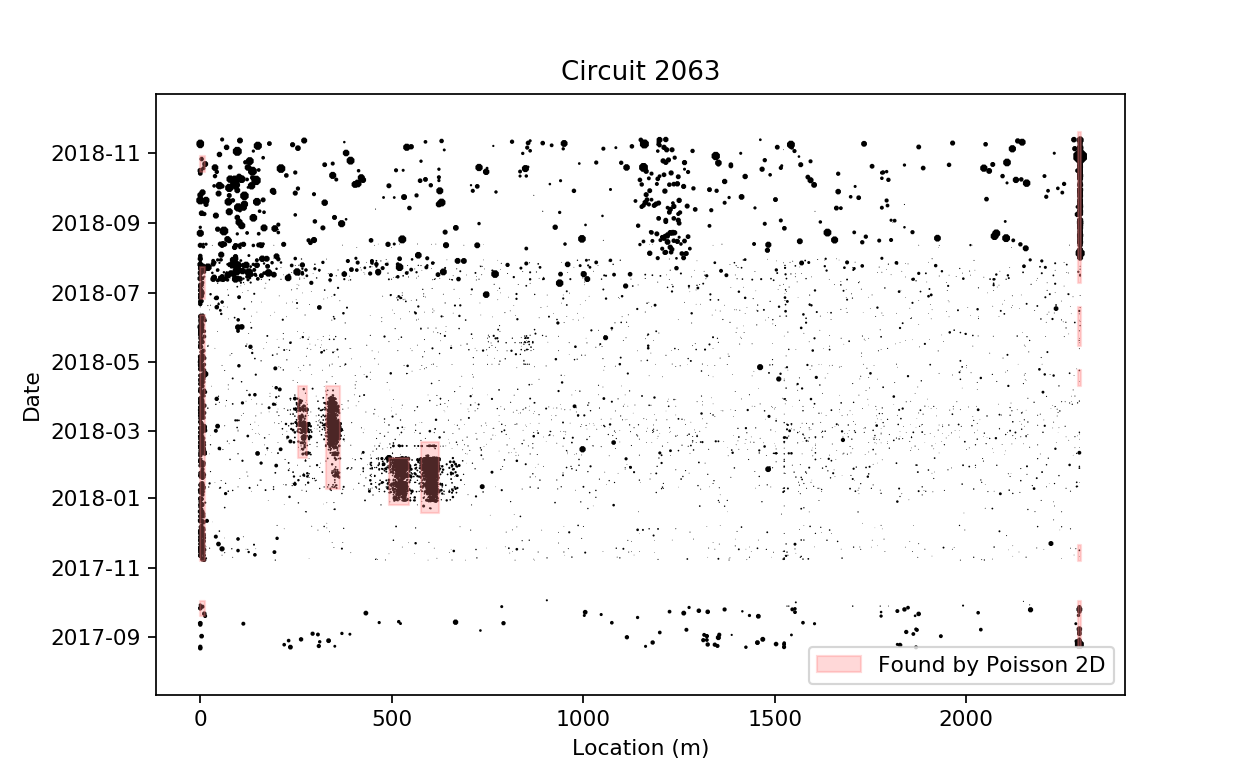

Saved to C:/dev/py/SCG-analyse/notebooks/plots/yolo.png
Saved to C:/dev/py/SCG-analyse/notebooks/plots/yolo.pdf


In [18]:
%matplotlib notebook

fig, ax = plt.subplots()

clusterizer.plot.draw_location_time_scatter(circuit, ax=ax)
clusterizer.plot.overlay_cluster_ensemble(clusters_poisson, ax=ax)

clusterizer.plot.legend_without_duplicate_labels()

clusterizer.plot.save_figure_for_google_slides("yolo")
clusterizer.plot.save_figure_for_latex("yolo")

In [ ]:
ens = (clusters_DBSCAN + clusters_DBSCANcoarse).most_confident()

#[c for c in ens if len(c.found_by)<2]
#ens

bool({1,2})

In [12]:
(clusterizer.globals.git_path / "notebooks" / "plots").as_posix()

'C:/dev/py/SCG-analyse/notebooks/plots'